# Import ploonetide and other libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ploonetide import TidalSimulation
from ploonetide.utils import colorline
from ploonetide.utils.functions import mean2axis
from ploonetide.utils.constants import GYEAR, KYEAR, DAY, MSUN, AU

## Create TidalSimulation object for star-planet system

In [2]:
simulation = TidalSimulation(
    system='star-planet',
    star_mass=0.8,  # Solar masses
    star_radius=1.0,  # Solar radii 
    star_rotperiod=10,  # days
    star_internal_evolution=False,
    planet_mass=2,  # Jupiter mass 
    planet_radius=1.3,  # Jupiter radius
    planet_orbperiod=2,  # days
    planet_rotperiod=2,  # days (here tidal-locking)
    planet_eccentricity=0.02,
    planet_size_evolution=True,
    planet_internal_evolution=False,
    planet_core_dissipation=False,
)

       _                        _   _     _      
 _ __ | | ___   ___  _ __   ___| |_(_) __| | ___ 
| '_ \| |/ _ \ / _ \| '_ \ / _ \ __| |/ _` |/ _ \
| |_) | | (_) | (_) | | | |  __/ |_| | (_| |  __/
| .__/|_|\___/ \___/|_| |_|\___|\__|_|\__,_|\___|
|_|                                              


Stellar mass: 0.8 solMass Msun
 Planet orbital period: 2.0 d days
 Planetary mass: 2.0 jupiterMass Mjup
 Planetary radius: 1.3 Rjup



### Choose the total integration time and time-step

In [3]:
integration_time = 1 * simulation.star_lifespan.to('s').value
timestep = 10 * KYEAR

### Choose the integrator and run the simulation

In [4]:
simulation.set_integration_method('lsoda')
simulation.run(integration_time, timestep)

 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000793102637D+17   r2 =  0.9308907097721D+00
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000793102637D+17   r2 =  0.9308907097721D+00
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000793102637D+17   r2 =  0.9308907097721D+00
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.1000793102637D+17   r2 =  0.7193810839681D+00
 lsoda--  warning..internal t (=r1) 

### Get the times and solutions

In [5]:
times, solutions = simulation.history    
nps = solutions[:, 0]
oms = solutions[:, 1]
eps = solutions[:, 2]
osms = solutions[:, 3]
mps = solutions[:, 4]
aps = mean2axis(nps, simulation.star_mass.to('kg').value, mps)

/Users/Jaime/Documents/MacquarieUni/PhD/software_packages/ploonetide/src/ploonetide/utils/functions.py:255: RuntimeWarning: divide by zero encountered in true_divide
  return (GCONST * (M + m) / N**2.0)**(1.0 / 3.0)


### Plot the solutions using matplotlib and a few helper functions from ploonetide 

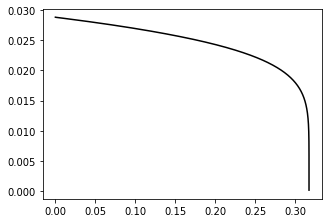

In [7]:
fig = plt.figure(figsize=(5, 3.5))
ax = fig.add_subplot(1, 1, 1)
ax.plot(times / GYEAR, aps / AU, 'k-')
fig.savefig("migration_star-planet.png", dpi=300, facecolor='w')